# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

`imports`, you've seen this before!

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [5]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [7]:
if os.path.isfile("city_pairs.csv"):
    filepath = "city_pairs.csv"
    print("loading from file")
else:
    filepath = "https://data.gov.au/data/dataset/d9fbffaa-836f-4f52-80e8-324249ff269f/resource/ebcafd83-9514-4f72-a995-fe7ee90cb9da/download/city_pairs.csv"
    print("loading from the internet")

airport_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [8]:
airport_data.head(10)

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,31048,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,31048,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,31048,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,31048,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,31048,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1
5,31048,Adelaide,Muscat,Oman,17,0.000,0.000,14,0.100,0.000,31,0.100,0.000,1985,1
6,31048,Adelaide,Rome,Italy,79,0.005,0.000,44,0.000,0.000,123,0.005,0.000,1985,1
7,31048,Adelaide,Singapore,Singapore,2496,37.345,0.000,2037,133.203,0.112,4533,170.548,0.112,1985,1
8,31048,Brisbane,Abu Dhabi,United Arab Emirates,0,0.000,0.000,3,0.000,0.000,3,0.000,0.000,1985,1
9,31048,Brisbane,Auckland,New Zealand,7157,223.258,0.671,5652,33.032,3.218,12809,256.290,3.889,1985,1


In [9]:
airport_data.columns

Index(['Month', 'AustralianPort', 'ForeignPort', 'Country', 'Passengers_In',
       'Freight_In_(tonnes)', 'Mail_In_(tonnes)', 'Passengers_Out',
       'Freight_Out_(tonnes)', 'Mail_Out_(tonnes)', 'Passengers_Total',
       'Freight_Total_(tonnes)', 'Mail_Total_(tonnes)', 'Year', 'Month_num'],
      dtype='object')

In [10]:
row_one = airport_data.iloc[1]
row_one

Month                        31048
AustralianPort            Adelaide
ForeignPort                Bahrain
Country                    Bahrain
Passengers_In                   12
Freight_In_(tonnes)              0
Mail_In_(tonnes)                 0
Passengers_Out                   5
Freight_Out_(tonnes)         0.033
Mail_Out_(tonnes)                0
Passengers_Total                17
Freight_Total_(tonnes)       0.033
Mail_Total_(tonnes)              0
Year                          1985
Month_num                        1
Name: 1, dtype: object

In [11]:
airport_data["Passengers_Total"]

0        2498
1          17
2          12
3         286
4        3039
         ... 
81396     571
81397    1273
81398       0
81399    1404
81400       0
Name: Passengers_Total, Length: 81401, dtype: int64

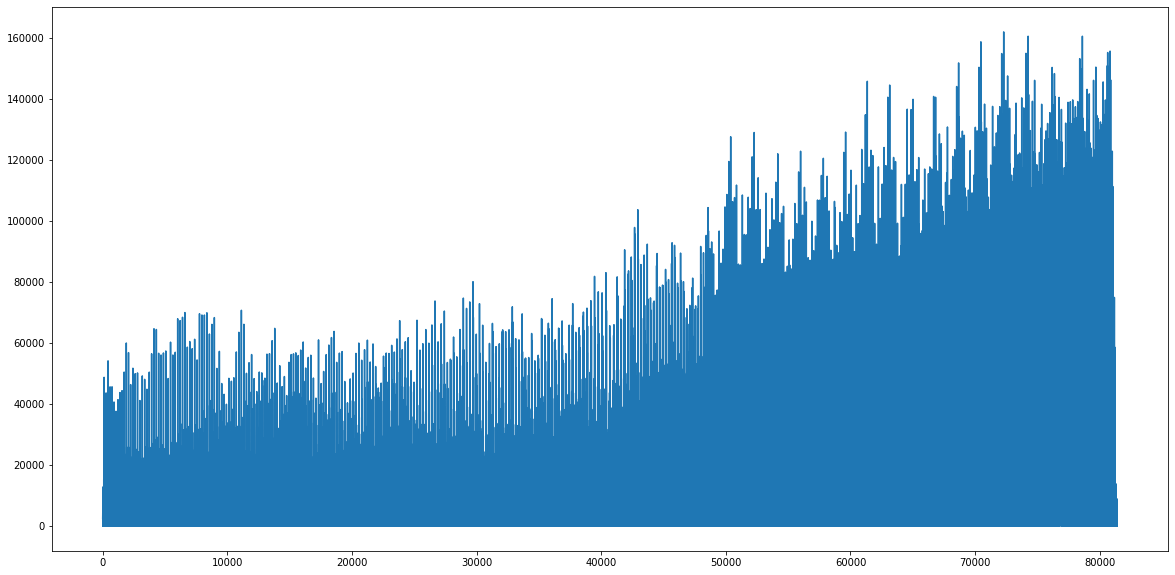

In [12]:
airport_data["Passengers_Total"].plot()

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

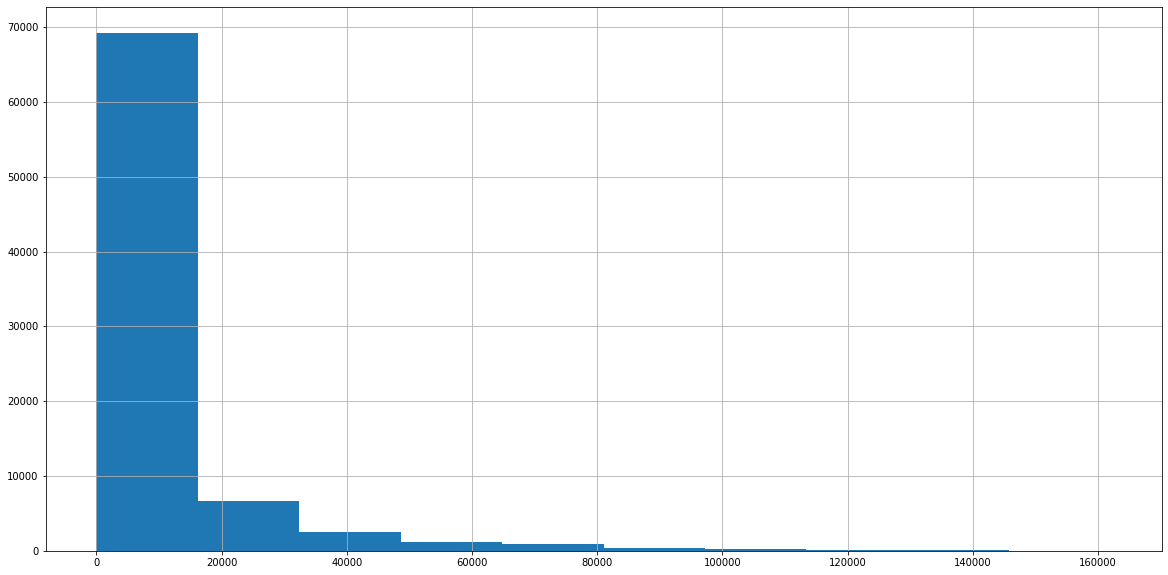

In [13]:
airport_data["Passengers_Total"].hist()

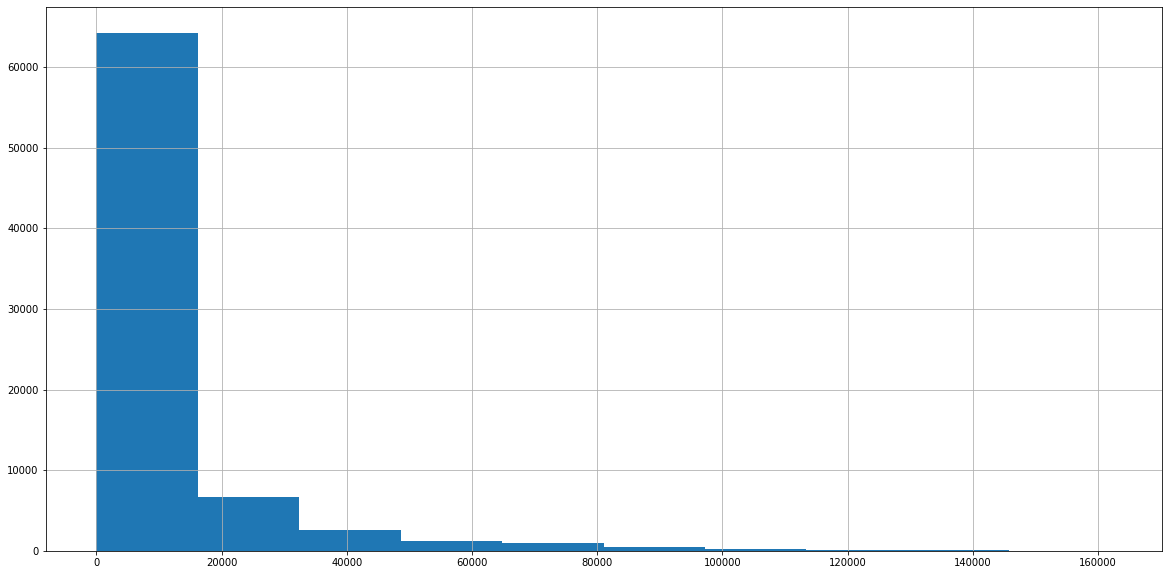

In [14]:
airport_data["Passengers_Total"][airport_data["Passengers_Total"] > 0].hist()

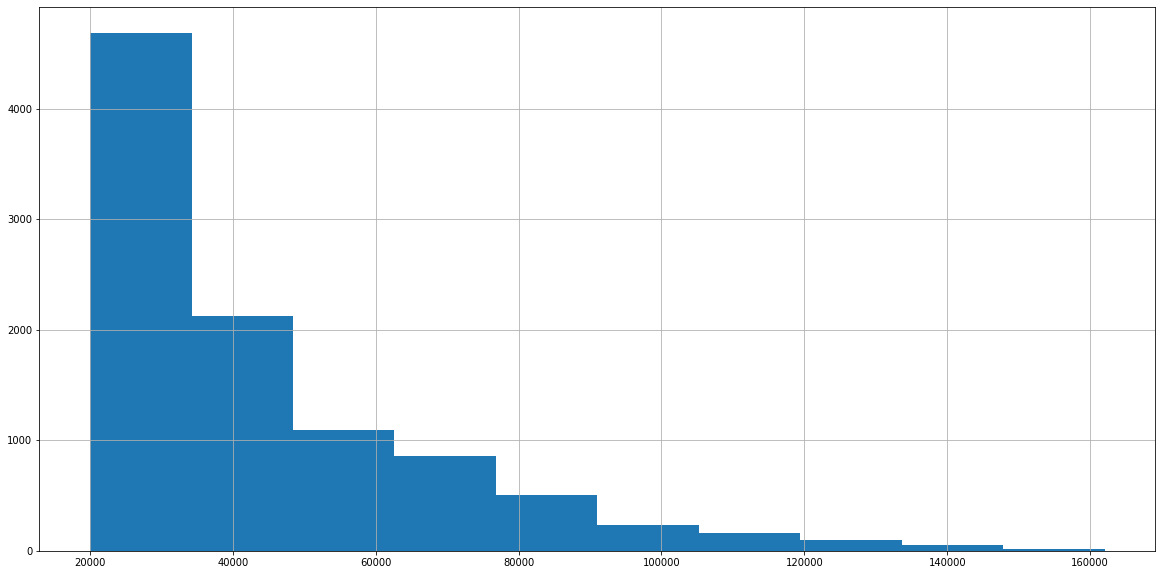

In [15]:
airport_data["Passengers_Total"][airport_data["Passengers_Total"] > 20000].hist()

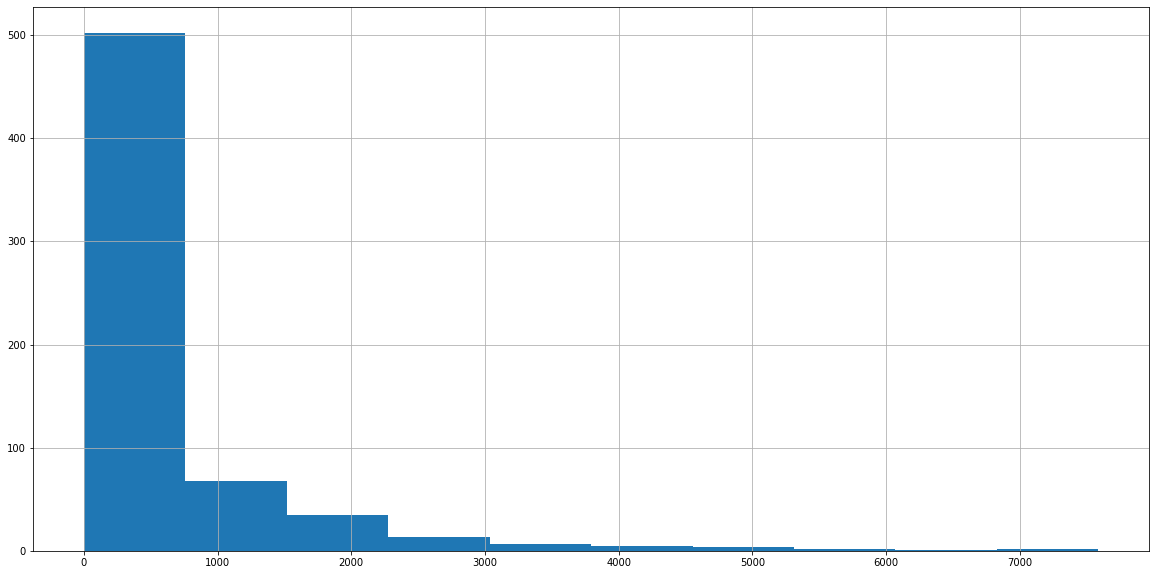

In [21]:
airport_data["Freight_Total_(tonnes)"][airport_data["Freight_Total_(tonnes)"] > 0][airport_data["Year"] == 2020].hist()

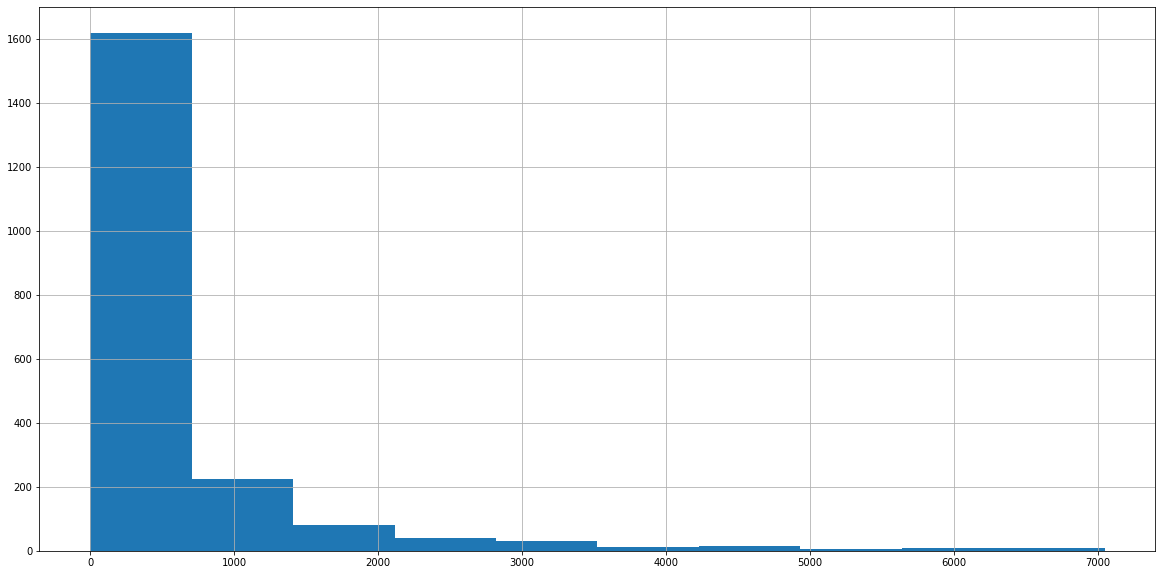

In [20]:
airport_data["Freight_Total_(tonnes)"][airport_data["Freight_Total_(tonnes)"] > 0][airport_data["Year"] == 2019].hist()

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 
![](http://blog.cloudera.com/wp-content/uploads/2015/12/distribution.png)
[img](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/)

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

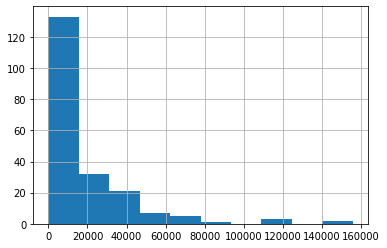

In [131]:
airport_data["Passengers_Total"][airport_data["Passengers_Total"] > 0][airport_data["AustralianPort"] == "Sydney"][airport_data["Year"] == 2020].hist()

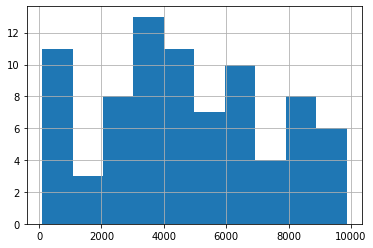

In [145]:
airport_data["Passengers_Total"][airport_data["Passengers_Total"] > 0][airport_data["Passengers_Total"] < 10000][airport_data["Year"] == 2020][airport_data["Month_num"] == 1].hist()

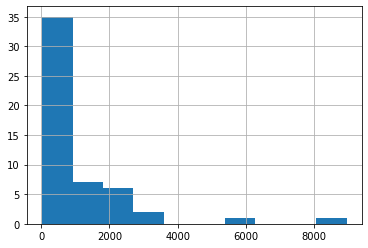

In [165]:
airport_data["Passengers_Total"][airport_data["Passengers_Total"] > 0][airport_data["Year"] == 2020][airport_data["Month_num"] == 5].hist()

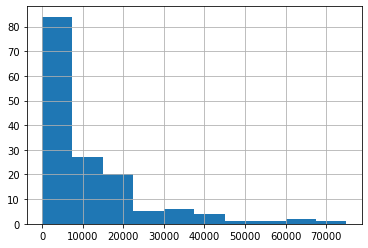

In [144]:
airport_data["Passengers_Total"][airport_data["Passengers_Total"] > 0][airport_data["Year"] == 2020][airport_data["Month_num"] == 3].hist()

monthly average passenger and freight quantity in the past 5 years

In [112]:
a = airport_data["Passengers_Total"][airport_data["Year"] == 2016]
a1 = a.sum()
b = airport_data["Passengers_Total"][airport_data["Year"] == 2017]
b1 = b.sum()
c = airport_data["Passengers_Total"][airport_data["Year"] == 2018]
c1 = c.sum()
d = airport_data["Passengers_Total"][airport_data["Year"] == 2019]
d1 = d.sum()
e = airport_data["Passengers_Total"][airport_data["Year"] == 2020]
e1 = e.sum()
ave_ms1 = [a1/12, b1/12, c1/12, d1/12, e1/5]

al= airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2016]
al1 = al.sum()
br = airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2017]
br1 = br.sum()
ch = airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2018]
ch1 = ch.sum()
de = airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2019]
de1 = de.sum()
ec = airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2020]
ec1 = ec.sum()

ave_ms2 = [al1/12, br1/12, ch1/12, de1/12, ec1/5]

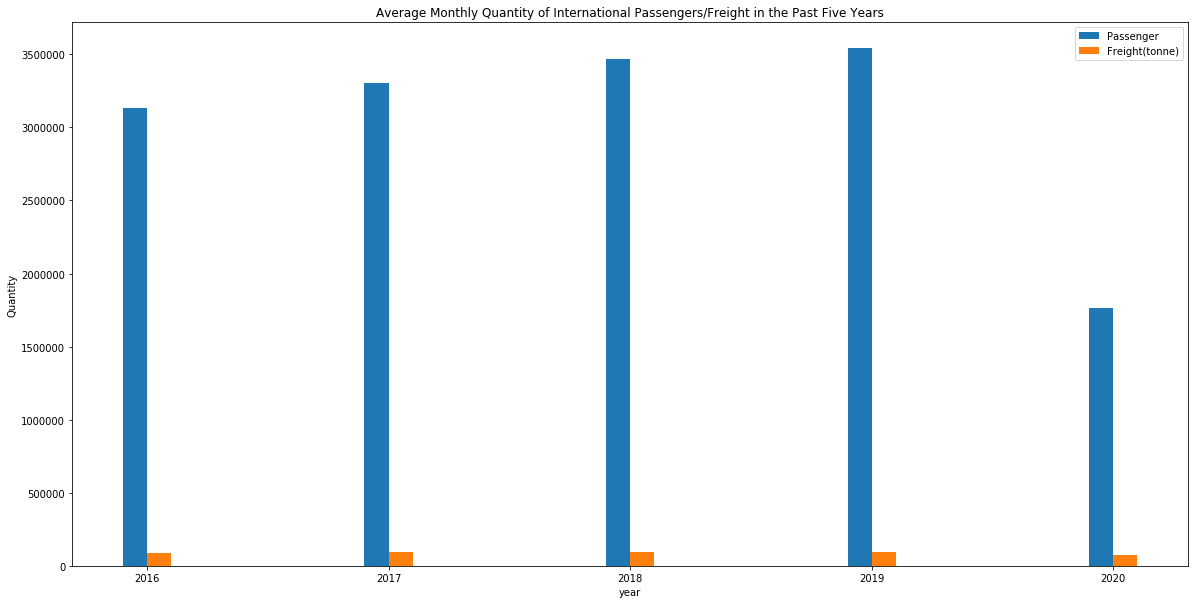

In [114]:
indxx = np.arange(len(ave_ms1))
bar_width = 0.1
indx_mxx = ["2016", "2017", "2018", "2019", "2020"]

fig, ax = plt.subplots()
pass1 = ax.bar(indxx - bar_width/2, ave_ms1, bar_width, label='Passenger')
fre1 = ax.bar(indxx + bar_width/2, ave_ms2, bar_width, label='Freight(tonne)')

ax.set_xticks(indxx)
ax.set_xticklabels(indx_mxx)

plt.xlabel("year")
plt.ylabel("Quantity")
plt.title("Average Monthly Quantity of International Passengers/Freight in the Past Five Years")

ax.legend()

plt.show()

2020, Passenger vs Freight

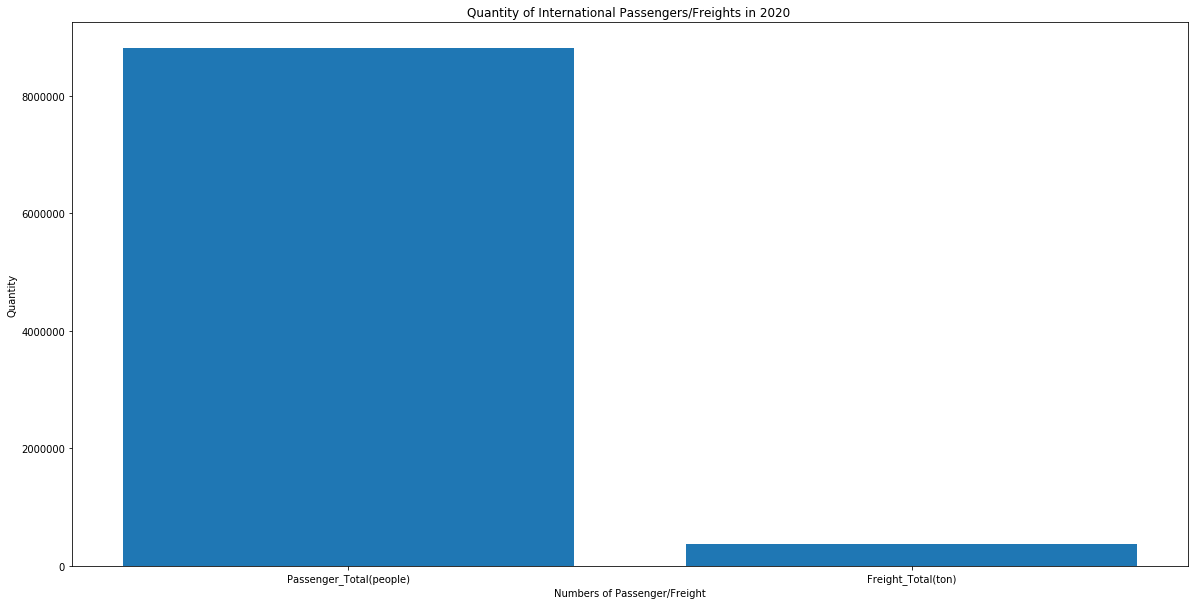

In [123]:
s_pa = airport_data["Passengers_Total"][airport_data["Year"] == 2020]
Pa_2020 = s_pa.sum()
s_fr = airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2020]
Fr_2020 = s_fr.sum()

x_axis = ["Passenger_Total(people)", "Freight_Total(ton)"]
y_axis = [Pa_2020, Fr_2020]

ind = np.arange(len(x_axis))
plt.bar(ind, y_axis)
plt.xticks(ind, x_axis)

plt.xlabel("Numbers of Passenger/Freight")
plt.ylabel("Quantity")
plt.title("Quantity of International Passengers/Freights in 2020 ")
plt.show()

2020, Passenger vs freight in different months

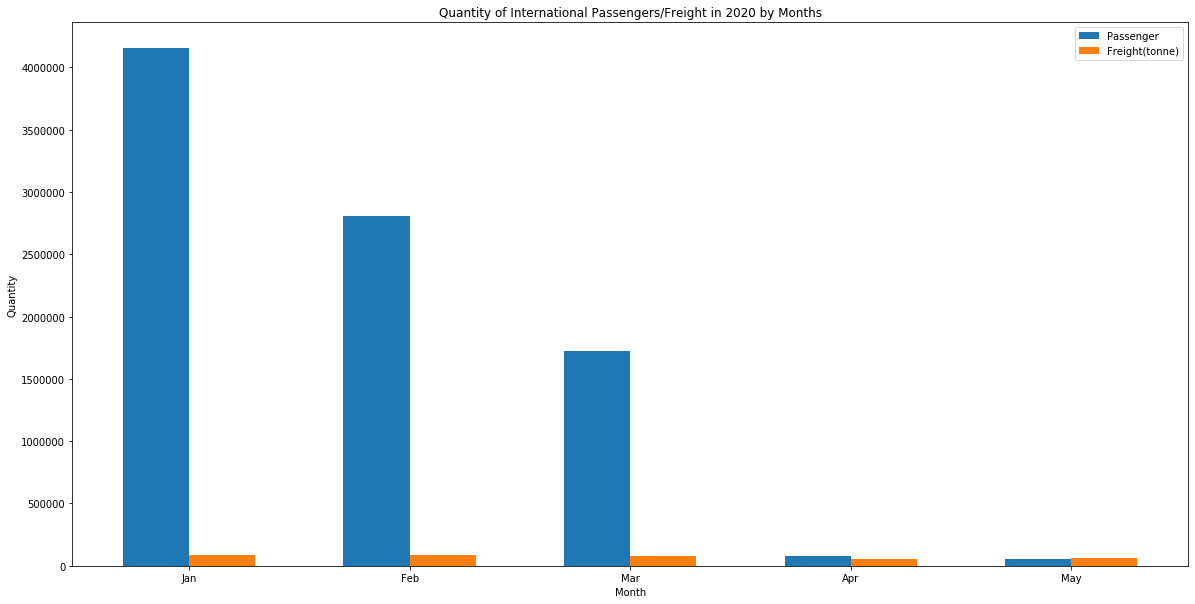

In [76]:
Pass_ms = []
for i in range(1,6):
    s_paa = airport_data["Passengers_Total"][airport_data["Year"] == 2020][airport_data["Month_num"] == i]
    s_2020pm = s_paa.sum()
    Pass_ms.append(s_2020pm)
    
Fre_ms = []
for ii in range(1,6):
    s_frr = airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2020][airport_data["Month_num"] == ii]
    s_2020fm = s_frr.sum()
    Fre_ms.append(s_2020fm)

indx = np.arange(len(Pass_ms))
bar_width = 0.3
indx_mx = ["Jan", "Feb", "Mar", "Apr", "May"]

fig, ax = plt.subplots()
barpass = ax.bar(indx - bar_width/2, Pass_ms, bar_width, label='Passenger')
barfre = ax.bar(indx + bar_width/2, Fre_ms, bar_width, label='Freight(tonne)')

ax.set_xticks(indx)
ax.set_xticklabels(indx_mx)

plt.xlabel("Month")
plt.ylabel("Quantity")
plt.title("Quantity of International Passengers/Freight in 2020 by Months")

ax.legend()

plt.show()

2020 internatioanl passengers in major airports by months

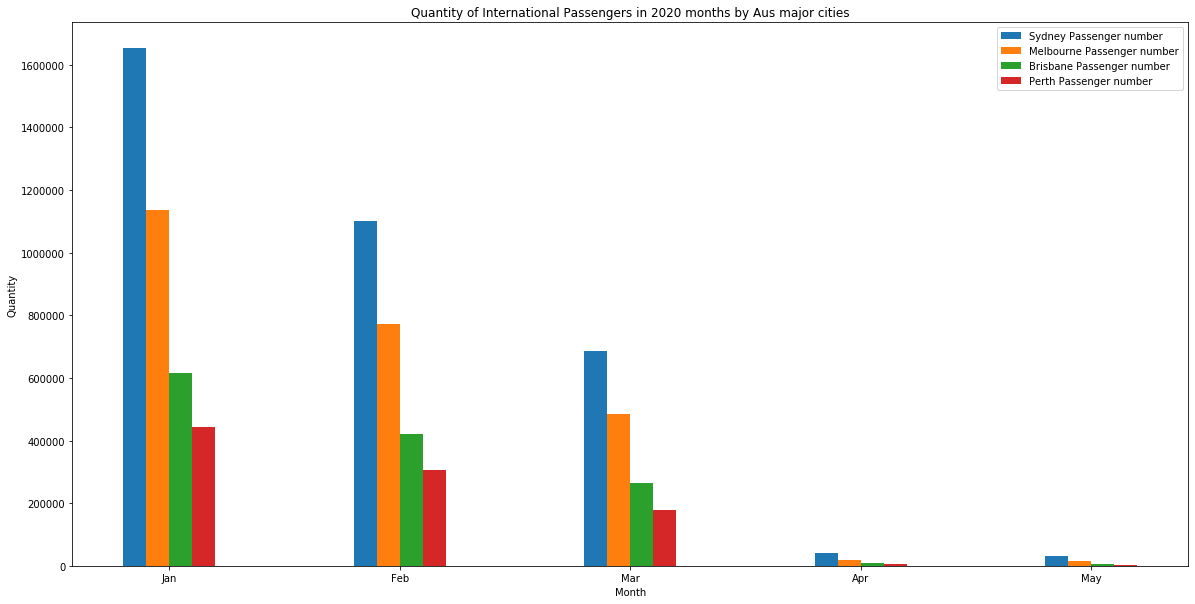

In [117]:
Syd_pass = []
for i in range(1,6):
    Syd_ms_pass = airport_data["Passengers_Total"][airport_data["Year"] == 2020][airport_data["Month_num"] == i][airport_data["AustralianPort"] == "Sydney"]
    s_Syd_ms_pass = Syd_ms_pass.sum()
    Syd_pass.append(s_Syd_ms_pass)

Mel_pass = []
for i in range(1,6):
    Mel_ms_pass = airport_data["Passengers_Total"][airport_data["Year"] == 2020][airport_data["Month_num"] == i][airport_data["AustralianPort"] == "Melbourne"]
    s_Mel_ms_pass = Mel_ms_pass.sum()
    Mel_pass.append(s_Mel_ms_pass)

Bri_pass = []
for i in range(1,6):
    Bri_ms_pass = airport_data["Passengers_Total"][airport_data["Year"] == 2020][airport_data["Month_num"] == i][airport_data["AustralianPort"] == "Brisbane"]
    s_Bri_ms_pass = Bri_ms_pass.sum()
    Bri_pass.append(s_Bri_ms_pass)

Per_pass = []
for i in range(1,6):
    Per_ms_pass = airport_data["Passengers_Total"][airport_data["Year"] == 2020][airport_data["Month_num"] == i][airport_data["AustralianPort"] == "Perth"]
    s_Per_ms_pass = Per_ms_pass.sum()
    Per_pass.append(s_Per_ms_pass)

indx1 = np.arange(len(Syd_pass))
bar_width1 = 0.1
indx_mx1 = ["Jan", "Feb", "Mar", "Apr", "May"]

fig, ax = plt.subplots()
syd = ax.bar(indx1 - 3/2 * bar_width1, Syd_pass, bar_width1, label='Sydney Passenger number')
mel = ax.bar(indx1 - bar_width1/2, Mel_pass, bar_width1, label='Melbourne Passenger number')
bri = ax.bar(indx1 + bar_width1/2, Bri_pass, bar_width1, label='Brisbane Passenger number')
per = ax.bar(indx1 + 3/2 * bar_width1, Per_pass, bar_width1, label='Perth Passenger number')

ax.set_xticks(indx1)
ax.set_xticklabels(indx_mx1)

plt.xlabel("Month")
plt.ylabel("Quantity")
plt.title("Quantity of International Passengers in 2020 months by Aus major cities")

ax.legend()

plt.show()

International freight quantity by months in major airports

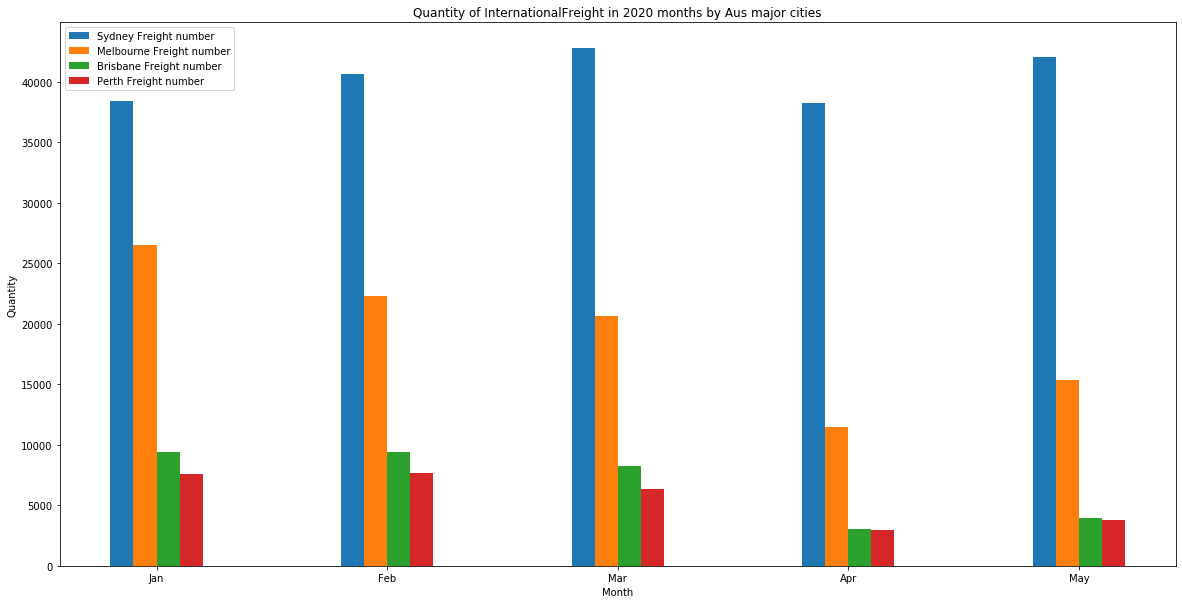

In [118]:
Syd_fre = []
for i in range(1,6):
    Syd_ms_fre = airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2020][airport_data["Month_num"] == i][airport_data["AustralianPort"] == "Sydney"]
    s_Syd_ms_fre = Syd_ms_fre.sum()
    Syd_fre.append(s_Syd_ms_fre)

Mel_fre = []
for i in range(1,6):
    Mel_ms_fre = airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2020][airport_data["Month_num"] == i][airport_data["AustralianPort"] == "Melbourne"]
    s_Mel_ms_fre = Mel_ms_fre.sum()
    Mel_fre.append(s_Mel_ms_fre)

Bri_fre = []
for i in range(1,6):
    Bri_ms_fre = airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2020][airport_data["Month_num"] == i][airport_data["AustralianPort"] == "Brisbane"]
    s_Bri_ms_fre = Bri_ms_fre.sum()
    Bri_fre.append(s_Bri_ms_fre)

Per_fre = []
for i in range(1,6):
    Per_ms_fre = airport_data["Freight_Total_(tonnes)"][airport_data["Year"] == 2020][airport_data["Month_num"] == i][airport_data["AustralianPort"] == "Perth"]
    s_Per_ms_fre = Per_ms_fre.sum()
    Per_fre.append(s_Per_ms_fre)

indx2 = np.arange(len(Syd_fre))
bar_width2 = 0.1
indx_mx2 = ["Jan", "Feb", "Mar", "Apr", "May"]

fig, ax = plt.subplots()
syd = ax.bar(indx2 - 3/2 * bar_width1, Syd_fre, bar_width1, label='Sydney Freight number')
mel = ax.bar(indx2 - bar_width1/2, Mel_fre, bar_width1, label='Melbourne Freight number')
bri = ax.bar(indx2 + bar_width1/2, Bri_fre, bar_width1, label='Brisbane Freight number')
per = ax.bar(indx2 + 3/2 * bar_width1, Per_fre, bar_width1, label='Perth Freight number')

ax.set_xticks(indx2)
ax.set_xticklabels(indx_mx2)

plt.xlabel("Month")
plt.ylabel("Quantity")
plt.title("Quantity of InternationalFreight in 2020 months by Aus major cities")

ax.legend()

plt.show()

In [39]:
matplotlib.rcParams.update(saved_style_state) # revert to regular matplotlib styles, not xkcd

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [40]:
ss = penalty_data.loc[:5]

Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [41]:
ss["day"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)
ss.head(1)

C:\Users\ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,SPEED_CAMERA_IND,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,16238,1


Above is equivalent to below, it's up to you to decide what is more readable.

In [42]:
def my_f(x):
    return x.day

ss["day"] = ss.apply(my_f, axis=1)
ss.head(1)

C:\Users\ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,SPEED_CAMERA_IND,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,16238,1


How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [47]:
def fold(given):
    """Return canonical versions of inputs."""
    
    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickehead!": ben_name_cannonical
    }

#     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)

print(fold("New-south"))
print(fold("BDoh"))

uni of stairs
Ben Doherty


# _fin_